# 초기 설정 

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings
import random
from mpl_toolkits.mplot3d import Axes3D

In [3]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

# 파일 불러오기
이상하게 파일 불러올 때 특정 파일경로를 통해서만 불러오고 있다. 경로 설정에 이상이 있는데 어떻게 해결을 해야될지 모르겠다. 
밑에 작성 해 놓은 dacon 이라는 파일은 USer/ opensource_SW 라는 파일 안에 dacon 이 있고, 그 안에 ML_class 를 넣었는데, 
opensource_SW 밖에다가 파일을 생성하고 불러오려고 시도하면 이상하게 먹히지 않는다.... 해결을 어떻게 해야되는지...

In [4]:
!ls -alF ./Dacon/ML_class/
    #저장한 폴더 속성보기 (터미널 명령어 실행 시 앞에 !)

total 144
-rw-r--r--   1 jae-wook.lee  staff   2615 Sep 28 16:06 (assignment)_ML_1(Taiwan_real_estate).ipynb
drwxr-xr-x   6 jae-wook.lee  staff    192 Sep 28 16:37 ./
drwxr-xr-x  19 jae-wook.lee  staff    608 Oct  7 20:20 ../
drwxr-xr-x   3 jae-wook.lee  staff     96 Sep 28 15:52 .ipynb_checkpoints/
-rw-r--r--@  1 jae-wook.lee  staff  32717 Sep 28 15:25 Taiwan_real_estate_dataset.csv
-rw-r--r--@  1 jae-wook.lee  staff  33116 Sep 28 16:36 Taiwan_real_estate_dataset.xlsx


# 편의를 위해 데이터 셋의 이름을 변경하였다. 
또한 평소에는 CSV 파일을 읽는 것이었기 때문에 read_csv 를 했었으나, 이번 데이터 셋은 excel 임을 놓쳤었다. 그래도 해결하여 다행.

In [5]:
data_dir=Path('./Dacon/ML_class')
trn_file = data_dir / 'hw1_data.xlsx'
seed = 42

In [6]:
trn=pd.read_excel(trn_file, index_col=0)
print(trn.shape)
trn.head()

(414, 7)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.9167,32.0,84.8788,10,24.9830,121.5402,37.9
2,2012.9167,19.5,306.5947,9,24.9803,121.5395,42.2
3,2013.5833,13.3,561.9845,5,24.9875,121.5439,47.3
4,2013.5000,13.3,561.9845,5,24.9875,121.5439,54.8
5,2012.8333,5.0,390.5684,5,24.9794,121.5425,43.1


# EDA 실행


우리가 예측해야되는 것은 price 이다. price 에 초점을 맞춰서 진행을 해보자. 

In [7]:
x1 = 'X1 transaction date'
x2 = 'X2 house age'
x3 = 'X3 distance to the nearest MRT station'
x4 = 'X4 number of convenience stores'
x5 = 'X5 latitude'
x6 = 'X6 longitude'
y  = 'Y house price of unit area'

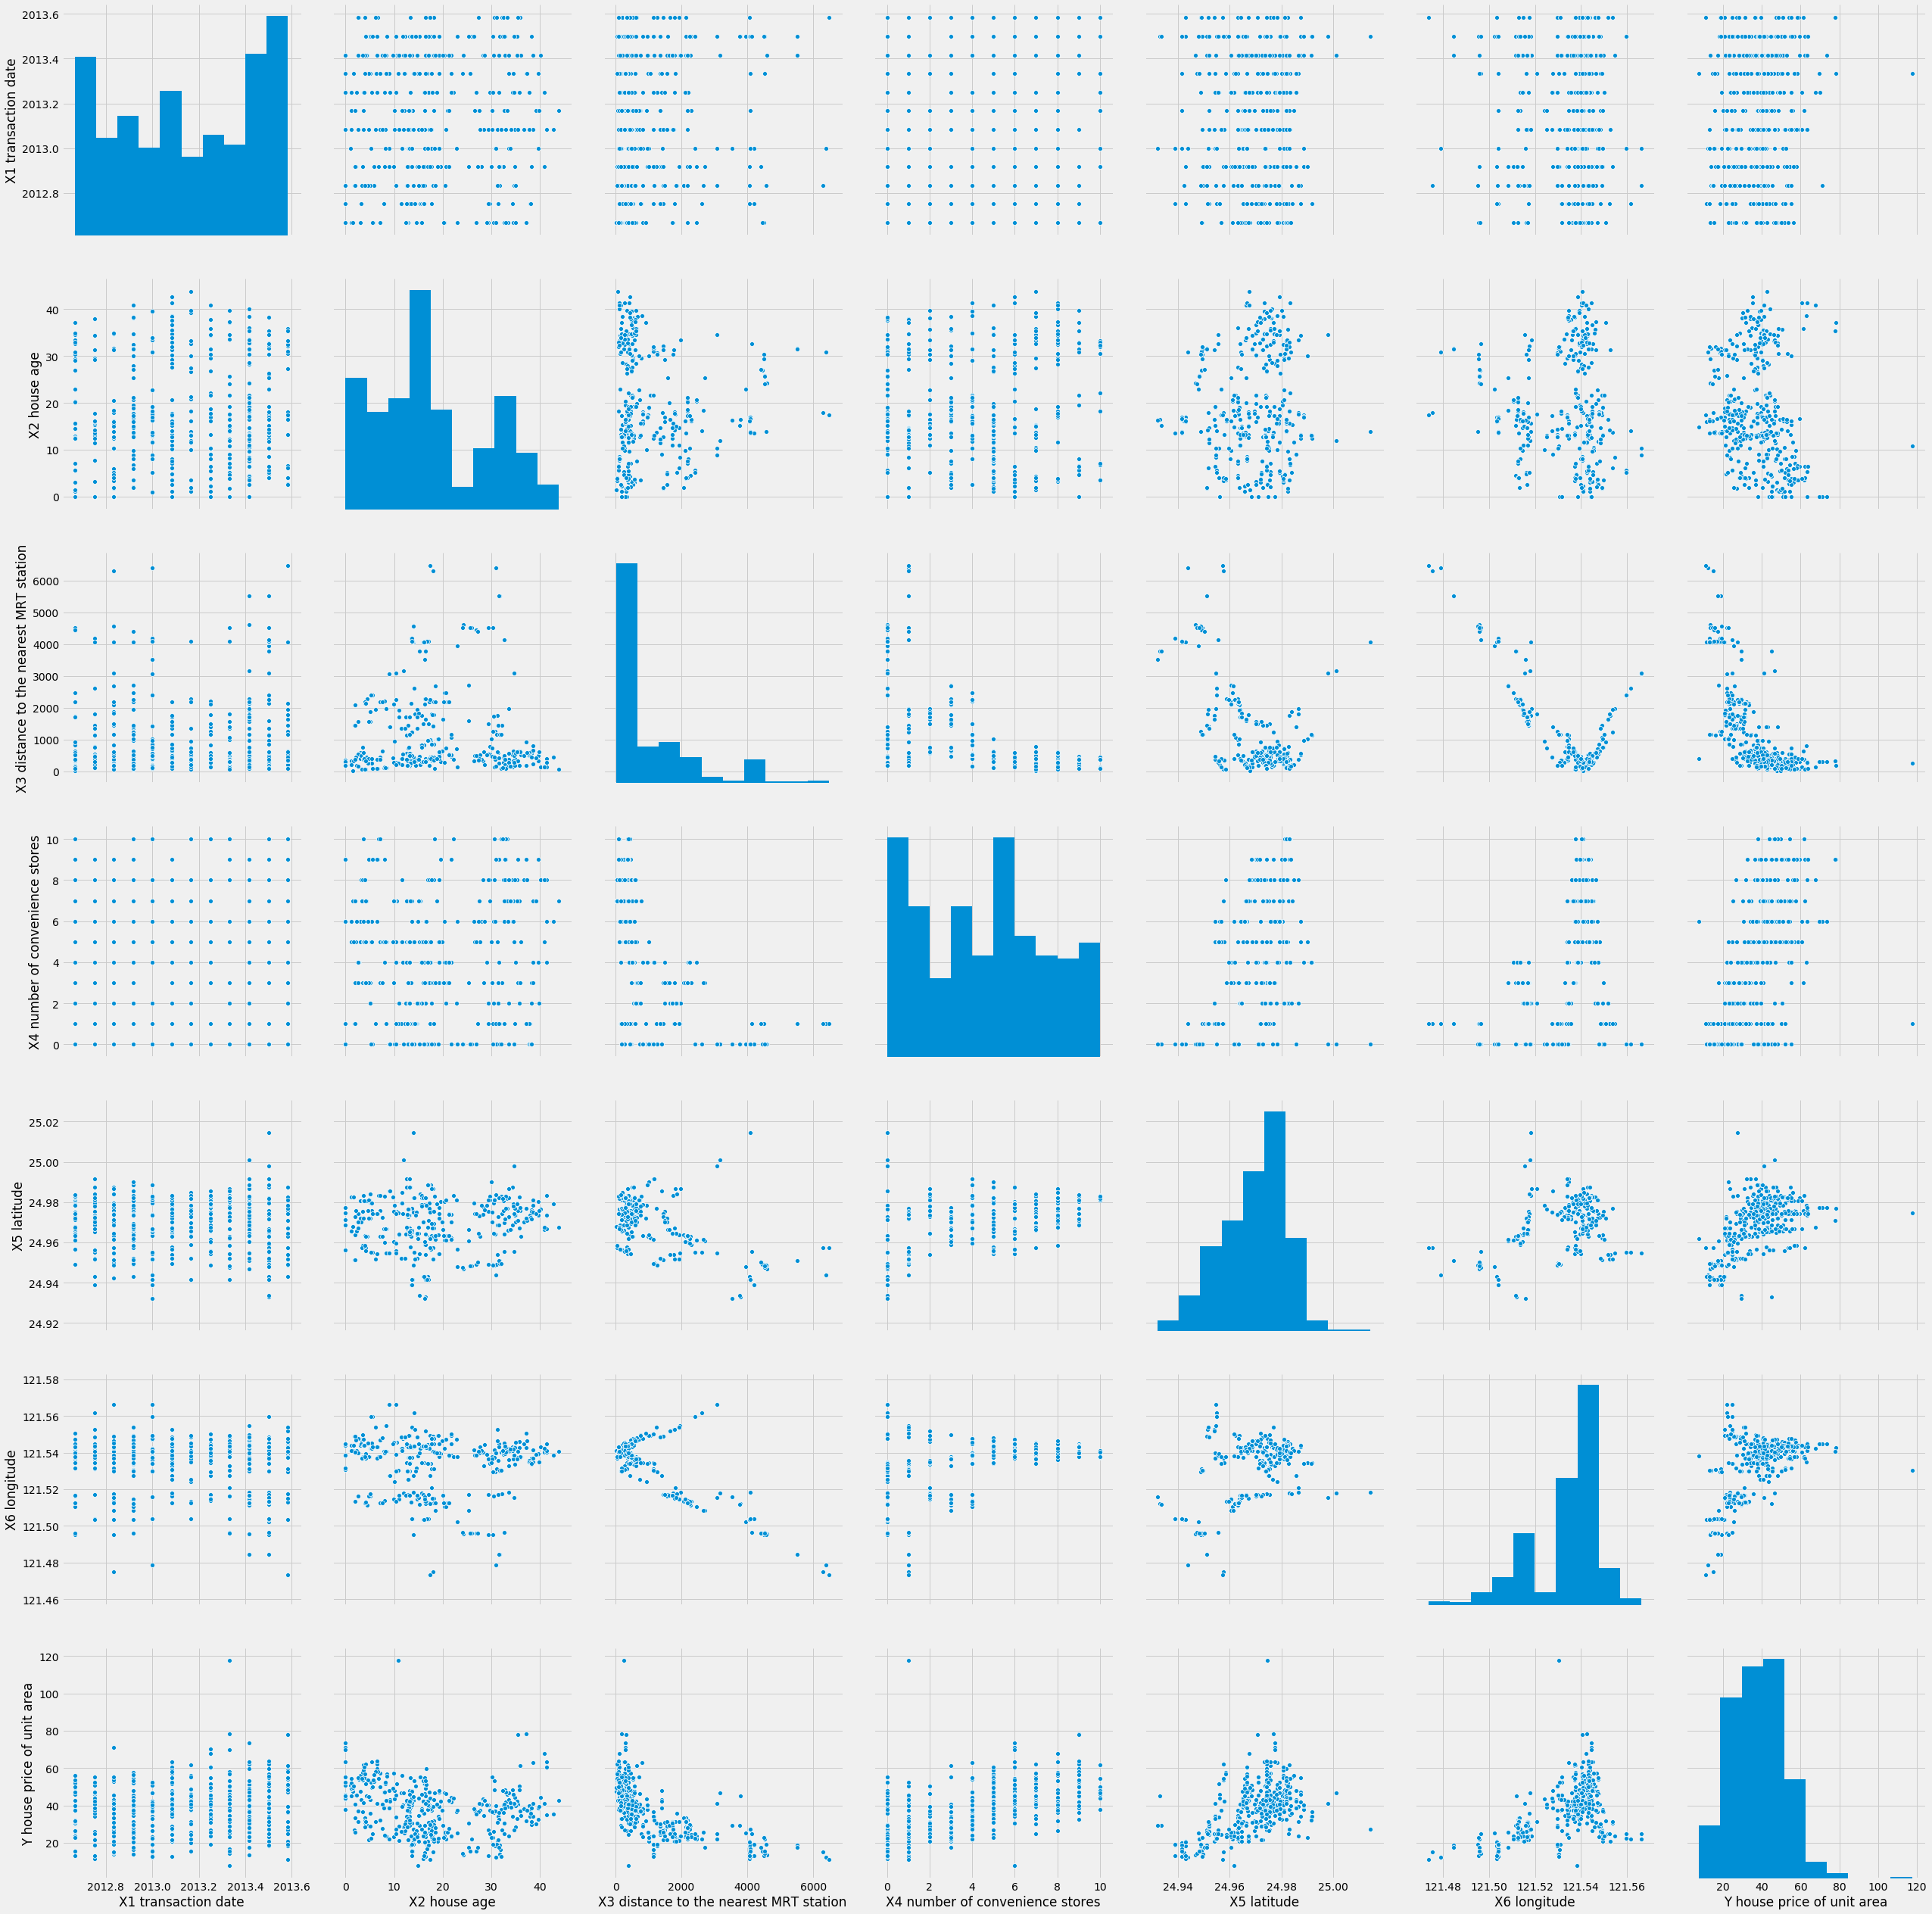

In [8]:
sns.pairplot(vars= [x1,x2,x3,x4,x5,x6,y],size=5,data = trn)

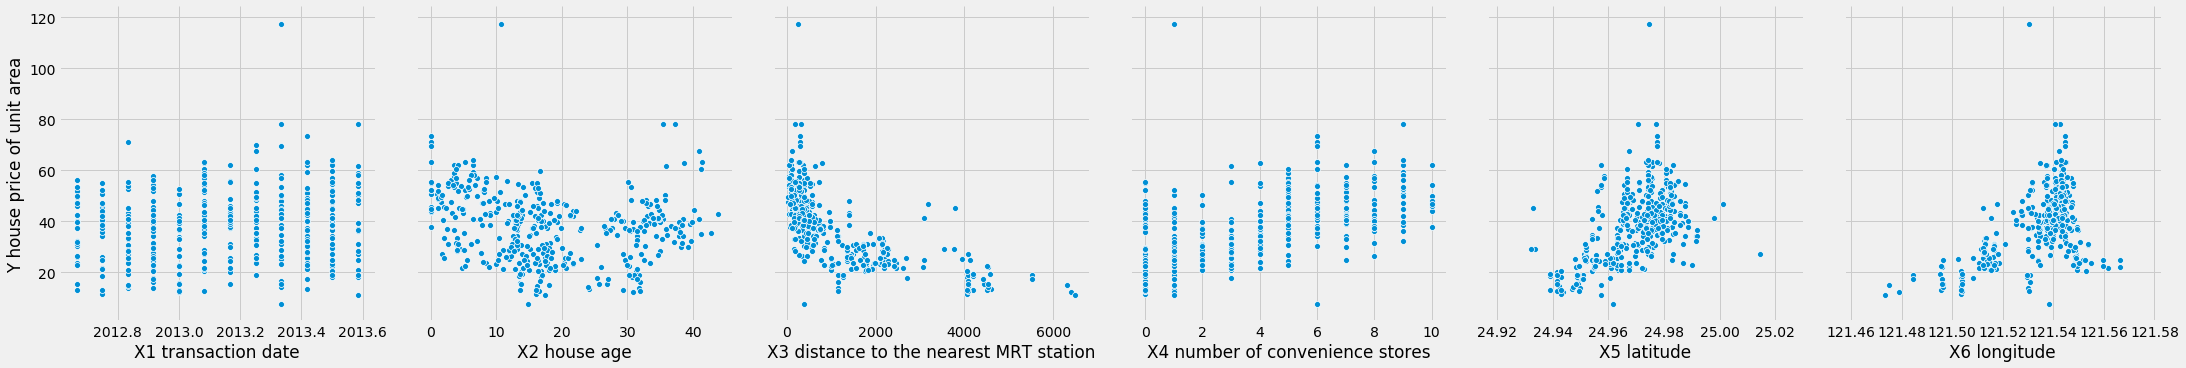

In [9]:
sns.pairplot(x_vars= [x1,x2,x3,x4,x5,x6], y_vars=y, size=5,data = trn)

# 이 중에서 우리는 x3 와. y 의 관계만 알아 내면 되는 것이므로 다른것들은 다 버리고 얘네 2개만 생각을 해보자. (task 1)
우리는 여기서 linear model 을 떠올릴수 있게끔 만들어야되는 것이다...


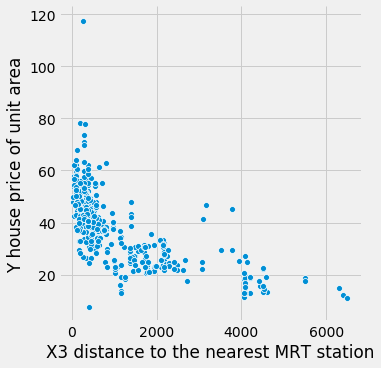

In [10]:
sns.pairplot(x_vars = x3, y_vars = y,
             size = 5, data = trn)

약간 멱급수 형태로 나온 것 같다. 이를 어떻게 잘 변형하면 이쁜 선형값이 나오지 않을까 조심스래 생각을 해본다.

그러나 주어진 과제(task1)에서는 y= theta0 + theta3*x3 의 형태를 요구하고 있다. 
어떻게 값을 만들던간에 데이터와 선형 모델이 일치하지 않을 수 밖에 없다. 

### EDA 를 성공했다. 이제 이를 통해서 
# Hypothesis 가 되는 모델과
# Cost function J(theta0,theta3) 제작에 들어가도록 하자. 


# Hypothesis 모델의 형태 : H(x3)=theta0+theta3*x3
우리는 형재 두가지 theta 값만 알아 두면 된다. 
# Cost function J(theta0,theta3) 을 설정하기에 앞서서, 
# Theta0,3 값에 대한 설정을 하자. 


# cost function 과 hypothesis 에 대해서 값을 알아 보기 전에 , X3 값에 log 를 취해서 멱학수 의 분포를 갖고 있는 놈을 좀 풀어주자. 

In [11]:
trn['X3 distance to the nearest MRT station']=trn['X3 distance to the nearest MRT station'].apply(np.log1p)

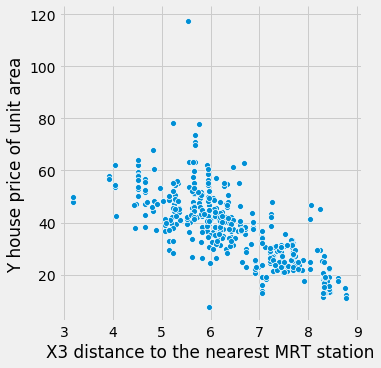

In [12]:
sns.pairplot(x_vars = x3, y_vars = y,
             size = 5, data = trn)

# 그래프가 아까 보다는 이쁘게 나왔다. 하지만, 이렇게 x3 값에 log 를 취해서 선형 모델을 작성하는 것이 맞는지는 모르겠다. 
이 상태에서 h 를 구하게 되면, 나중에 다시 푼다고 해도 안된다고 생각은 된다. 

# cost function 구해보자..... 이게 어려운 부분일 것같다. 세타 값을 gradient descent 로 구 하는 것이 어려울것 같다. 

초반에 세타값들이 결정되지 않으면, 내 생각에는 아무것도 안될 것 이기 때문에, 초반에는 임의의 숫자를 넣은 뒤에
temp0 값을 업데이트 하는 방식으로 진행하는 것이 옳바른 것 같다. 

 X3 에는 이 칼럼이 갖고 있는 value 들을 넣은 것이다. 

In [13]:
X3 = trn['X3 distance to the nearest MRT station'].values
Y = trn['Y house price of unit area'].values
print(X3.shape,Y.shape)
print(type(X3))
print(X3[0])
print(X3.shape[0])


(414,) (414,)
<class 'numpy.ndarray'>
4.452937232813715
414


# x3, y 의 값을 value 함수로 다 뽑아 냈다. 1차원 어레이로 들어간 것 같다. 

In [14]:
def gradient_descent(alpha,x,y,stp=0.0001, max_repeat=10000):
    m = x.shape[0]
    converged = False
    repeat = 0
    theta0 = 1.0
    theta3 = -1.0
#     J=sum([(theta0 +theta3*x[i]- y[i])**2 for i in range(m-1)]) / 2*m #######
    J=1
    
    while not converged : 
        grad0= sum([(theta0 +theta3*x[i]-y[i]) for i in range (0, m-1)]) / m
        grad1= sum([(theta0 + theta3*x[i]-y[i])*x[i] for i in range (0, m-1)])/ m
        
        temp0 = theta0 - alpha*grad0
        temp1 = theta3 - alpha*grad1
        
        theta0 = temp0
        theta3 = temp1
    
        msqe = sum([(theta0 + theta3*x[i] - y[i]) **2 for i in range(0, m-1)]) / 2*m
        if repeat % 500 == 0:
            print(theta0,theta3,msqe)
            
            
        if abs(J-msqe) <= stp:
            print ('Converged, iterations: {0}', repeat, '!!!')
            converged = True
        
        J = msqe
        repeat += 1
        
        if repeat == max_repeat:
                converged = True
                print("max 까지 갔다")
  
   
    return theta0, theta3, J

[theta0,theta3,J]=gradient_descent(0.01,X3,Y,stp=0.0000001,max_repeat=1000000)


print("************\n theta0 : {0}\ntheta3 : {1}\nJ : {2}\n"
          .format(theta0,theta3,J))

1.4321209165619975 1.6674495111509642 76102607.97926894
14.372839229539434 3.3178289877285305 23575538.107452966
25.12320157971291 1.6860920969162707 19516276.10329156
34.44005253983403 0.27193981789249116 16467404.224794095
42.514544262590725 -0.9536417568874253 14177426.459879385
49.51233964001277 -2.0157976638007216 12457446.620520558
55.57701117918311 -2.9363199642386903 11165586.632565174
60.8329866535007 -3.7340948484043452 10195283.266043019
65.38810196489108 -4.425490119874383 9466497.924084786
69.33581359357913 -5.024691010876434 8919114.40159233
72.75711602785758 -5.5439912181432 8507980.006530078
75.72220351341176 -5.994045130473554 8199180.994763066
78.2919102160125 -6.3840864229080845 7967245.08569413
80.51895834513618 -6.722117502376481 7793040.299196214
82.44903984603826 -7.015073691638824 7662196.792640402
84.12175385316196 -7.268965520053157 7563921.518166143
85.57141913844667 -7.489002040523629 7490107.923382395
86.8277782233887 -7.679697702700446 7434667.256296543
87

94.99298402634152 -8.919048256269223


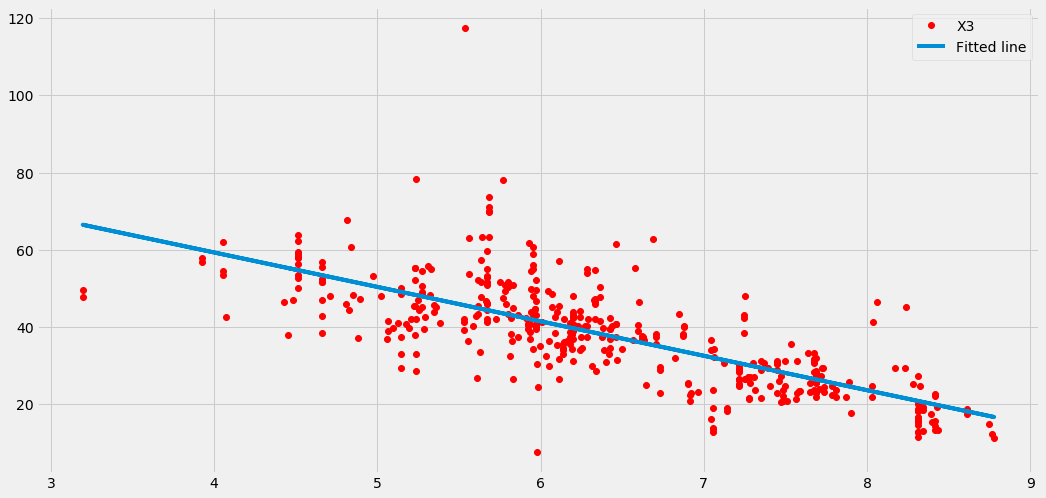

In [15]:
plt.plot(X3,Y, 'ro', label='X3')
plt.plot(X3, np.array(theta3*X3+theta0), label='Fitted line')
plt.legend()
plt.show
print(theta0,theta3)

# task2 를 위해서 일단 EDA 를 해보자. 
내 생각에는 독립변수가 2 개 이기 때문에 가시적으로 표현하려면 우리가 아는 3차원 그래프로 그려야되는 것 같다. 

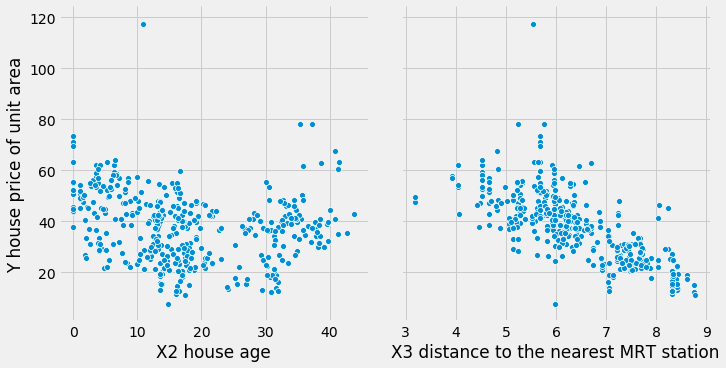

In [16]:
sns.pairplot(x_vars= [x2,x3], y_vars=y, size=5,data = trn)

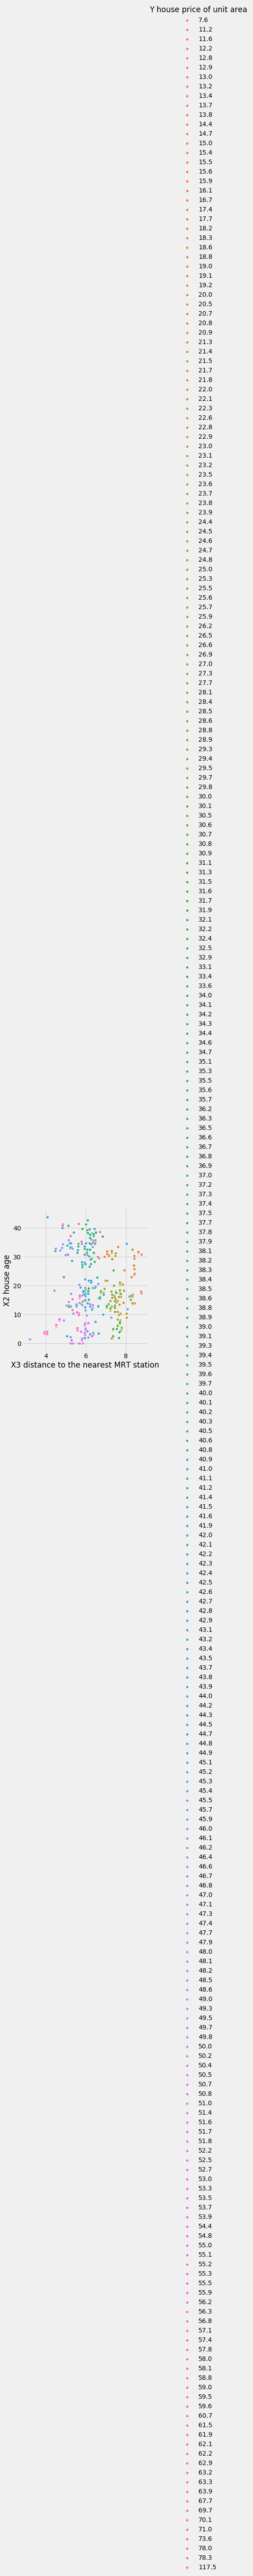

In [17]:
sns.pairplot(x_vars= x3, y_vars=x2,hue=y, size=5,data = trn)

In [18]:
X3 = trn['X3 distance to the nearest MRT station'].values
X2 = trn['X2 house age'].values
Y = trn['Y house price of unit area'].values

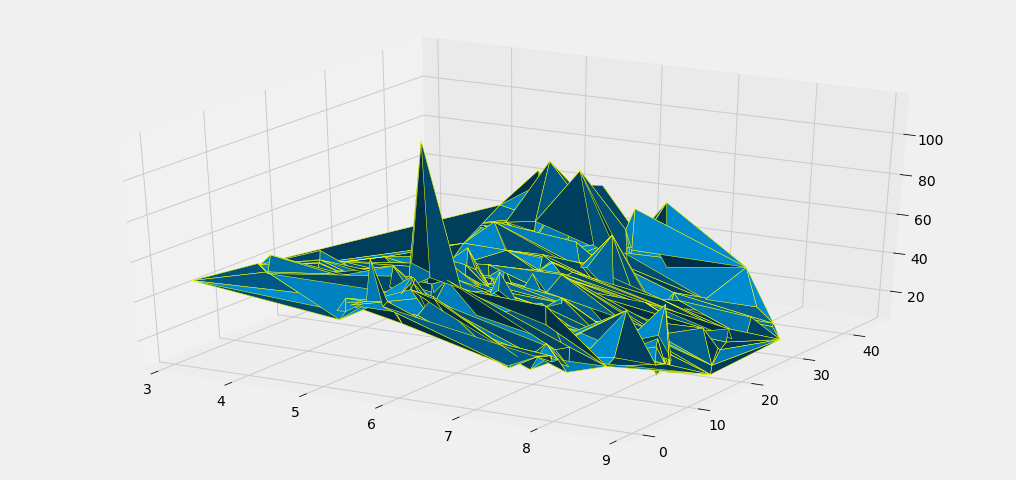

In [19]:
fig=plt.figure()
ax=fig.gca(projection='3d')
surf = ax.plot_trisurf(X3,X2,Y,Color='Yellow')


In [20]:
# fig=plt.figure()
# ax=fig.gca(projection='3d')
# graph=ax.scatter(X3,X2,Y)
# plt.show()

In [21]:
def gradient_descent(alpha,x,y,z,stp=0.0001, max_repeat=10000000):
    m = x.shape[0]
    converged = False
    repeat = 0
    theta0 = 1.0
    theta3 = -1.0
    theta2 = 1.0
    J=sum([(theta0 +theta3*x[i]+theta2*y[i]- z[i])**2 for i in range(m)]) / 2*m #######
    
    while not converged : 
        grad0 = sum([(theta0 + theta3*x[i] + theta2*y[i] - z[i]) for i in range (m)]) / m
        grad1 = sum([(theta0 + theta3*x[i] + theta2*y[i] - z[i])*x[i] for i in range (m)])/ m
        grad2 = sum([(theta0 + theta3*x[i] + theta2*y[i] - z[i])*y[i] for i in range (m)])/m
        
        temp0 = theta0 - alpha*grad0
        temp1 = theta3 - alpha*grad1
        temp2 = theta2 - alpha*grad2
        
        theta0 = temp0
        theta3 = temp1
        theta2 = temp2
        
        msqe = sum([(theta0 + theta3*x[i] +theta2*y[i] - z[i]) **2 for i in range(m)]) / 2*m
        
        if repeat % 500 == 0:
            print("theta0 : {0} theta3 : {1} theta2 : {2} J : {3}".format(theta0,theta3,theta2,msqe))
            
        if abs(J-msqe) <= stp:
            print ('Converged, iterations: {0}', repeat, '!!!')
            converged = True
        
        J = msqe
        repeat += 1
        
        if repeat == max_repeat:
                converged = True
                print("max 까지 갔다")
  

    print("$$$$$$$$$$$$$\n {0}  th\n theta0 : {1}\n theta3 : {2}\n theta2 : {3}\n J : {4}\n$$$$$$$$$$$$$".
          format(repeat, theta0, theta3, theta2, J))

    return theta0, theta3, theta2, J

[theta0,theta3,theta2, J]=gradient_descent(0.0001,X3,X2,Y,stp=0.00001,max_repeat=100000)

print(theta0,theta3,theta2, J)

theta0 : 1.0025662371507984 theta3 : -0.9846636422916152 theta2 : 1.0293359128832202 J : 85146913.97378606
theta0 : 1.5424028242718506 theta3 : 1.819372470920111 theta2 : 0.9378638021325444 J : 40645082.353024416
theta0 : 1.8826170650484764 theta3 : 3.245581966514761 theta2 : 0.5463099249215759 J : 32514573.327376153
theta0 : 2.128164637257454 theta3 : 4.012718462262944 theta2 : 0.3331335550672845 J : 30065080.365703326
theta0 : 2.322129988053164 theta3 : 4.421334116174827 theta2 : 0.21699403909819007 J : 29296899.06232293
theta0 : 2.4879509921096603 theta3 : 4.634928021904114 theta2 : 0.15364240313476063 J : 29026390.854109094
theta0 : 2.63837787110339 theta3 : 4.742442982283745 theta2 : 0.11900739107430405 J : 28903279.559720397
theta0 : 2.7803468082488 theta3 : 4.792263491393845 theta2 : 0.0999943404592191 J : 28823907.11686305
theta0 : 2.917631174117542 theta3 : 4.8107104938811105 theta2 : 0.08947980963031246 J : 28757597.51584416
theta0 : 3.052283782338761 theta3 : 4.8121024562775

theta0 : 11.717171293868239 theta3 : 3.5881043543587956 theta2 : 0.05227300065246382 J : 24887257.144507125
theta0 : 11.836695599534291 theta3 : 3.5708781480111957 theta2 : 0.05193164441544422 J : 24837268.128428943
theta0 : 11.956053974002122 theta3 : 3.553675856172398 theta2 : 0.051590762070735645 J : 24787417.81183373
theta0 : 12.075246647627885 theta3 : 3.5364974456427785 theta2 : 0.051250352960449774 J : 24737705.809885986
theta0 : 12.194273850447972 theta3 : 3.5193428832687856 theta2 : 0.05091041642761442 J : 24688131.73881797
theta0 : 12.313135812179413 theta3 : 3.502212135942911 theta2 : 0.05057095181616608 J : 24638695.21592684
theta0 : 12.43183276222035 theta3 : 3.485105170603589 theta2 : 0.05023195847095472 J : 24589395.859571517
theta0 : 12.550364929650447 theta3 : 3.468021954235163 theta2 : 0.049893435737738974 J : 24540233.28916978
theta0 : 12.668732543231334 theta3 : 3.450962453867815 theta2 : 0.049555382963185166 J : 24491207.125195507
theta0 : 12.786935831407051 theta3

theta0 : 20.45145455569386 theta3 : 2.329292893977158 theta2 : 0.027328266184351357 J : 21417175.217947908
theta0 : 20.558853377096742 theta3 : 2.313814249289237 theta2 : 0.02702153980489131 J : 21376814.288332276
theta0 : 20.6661031006653 theta3 : 2.2983570930345363 theta2 : 0.026715239242383327 J : 21336565.34411876
theta0 : 20.773203933386597 theta3 : 2.2829213953814467 theta2 : 0.026409363905683676 J : 21296428.074592784
theta0 : 20.880156081960273 theta3 : 2.267507126539788 theta2 : 0.026103913204464847 J : 21256402.16990186
theta0 : 20.986959752799063 theta3 : 2.252114256760728 theta2 : 0.02579888654922281 J : 21216487.321053233
theta0 : 21.09361515202915 theta3 : 2.2367427563367364 theta2 : 0.025494283351269516 J : 21176683.219911393
theta0 : 21.200122485490585 theta3 : 2.221392595601518 theta2 : 0.02519010302273409 J : 21136989.55919594
theta0 : 21.30648195873762 theta3 : 2.206063744929972 theta2 : 0.024886344976562932 J : 21097406.03247883
theta0 : 21.41269377703916 theta3 : 2

25.139487556655858 1.6536393238609994 0.013939447104272019


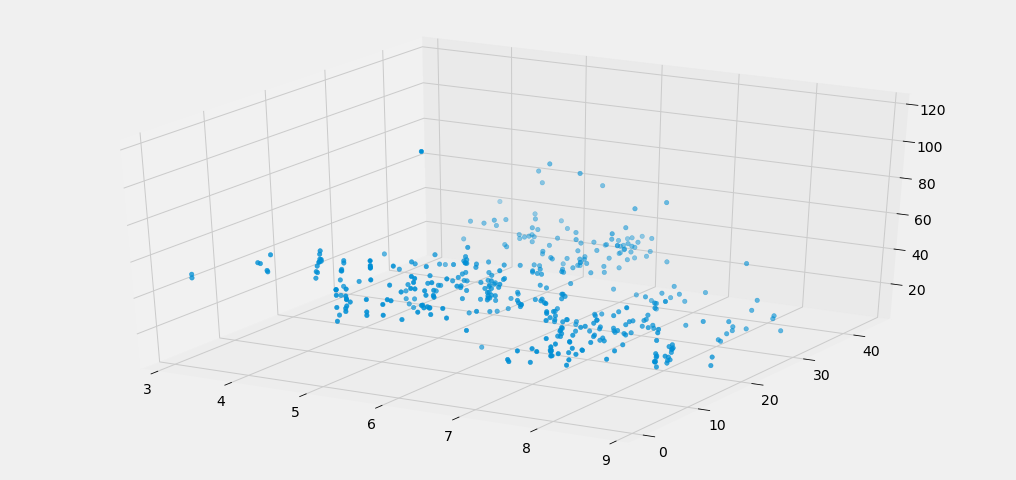

In [22]:
print(theta0,theta3,theta2)
fig=plt.figure()
ax=fig.gca(projection='3d')
graph=ax.scatter(X3,X2,Y)
plt.show()

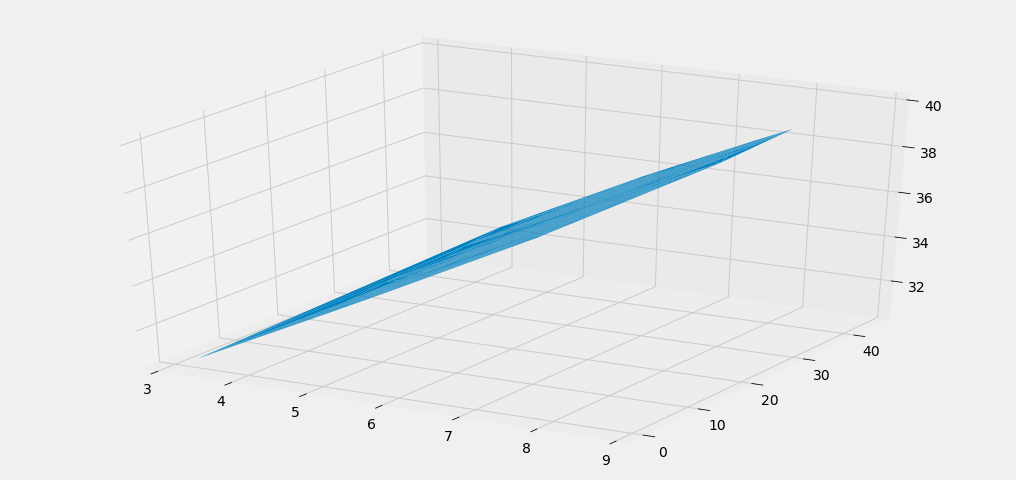

In [23]:
Y = trn['Y house price of unit area'].values
# print(Y)
fig=plt.figure()
ax=fig.gca(projection='3d')

Y_1= theta0+theta3*X3+theta2*X2
# print(Y_1)
ax.plot_trisurf(X3,X2,np.array(theta0+theta3*X3+theta2*X2))

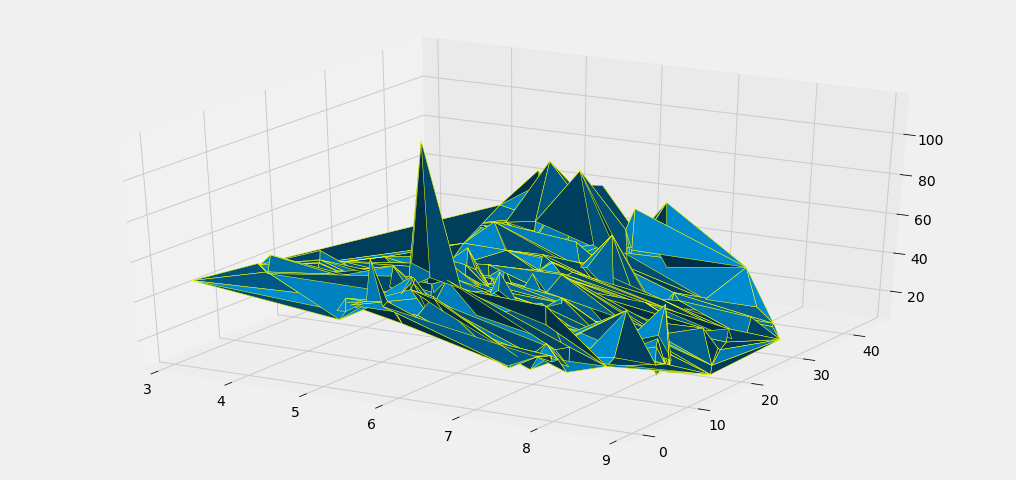

In [24]:
fig=plt.figure()
ax=fig.gca(projection='3d')
surf = ax.plot_trisurf(X3,X2,Y,Color='Yellow')



[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   25.3  45.4  43.2  21.8  16.1  41.   51.8
  59.5  34.6  51.   62.2  38.2  32.9  54.4  45.7  30.5  71.   47.1  26.6
  34.1  28.4  51.6  39.4  23.1   7.6  53.3  46.4  12.2  13.   30.6  59.6
  31.3  48.   32.5  45.5  57.4  48.6  62.9  55.   60.7  41.   37.5  30.7
  37.5  39.5  42.2  20.8  46.8  47.4  43.5  42.5  51.4  28.9  37.5  40.1
  28.4  45.5  52.2  43.2  45.1  39.7  48.5  44.7  28.9  40.9  20.7  15.6
  18.3  35.6  39.4  37.4  57.8  39.6  11.6  55.5  5

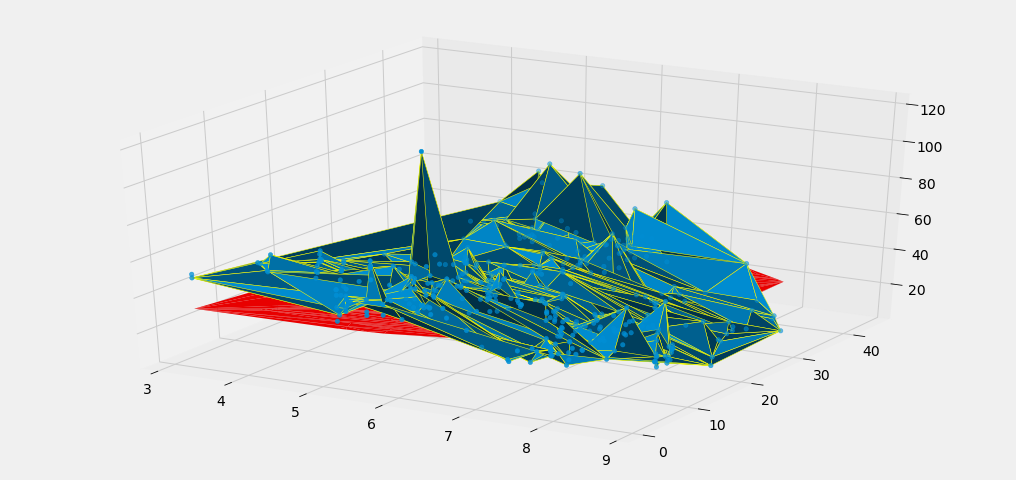

In [25]:
Y = trn['Y house price of unit area'].values
print(Y)
fig=plt.figure()
ax=fig.gca(projection='3d')
surf = ax.plot_trisurf(X3,X2,Y,Color='Yellow')

Y_1= theta0+theta3*X3+theta2*X2
print(Y_1)
ax.plot_trisurf(X3,X2,Y_1,color="red")

graph=ax.scatter(X3,X2,Y)
plt.show()

# task 3 

이거는 스케일링이 필요 없다고 한다. 

우리는 x0 을 1 이라고 가정하고 진행을 하기 때문에 행렬도 x0 =1 로 설정하고 진행하면 된다.

In [26]:
X = trn
Y = trn['Y house price of unit area']
X.drop(['X1 transaction date', 'X4 number of convenience stores', 
        'X5 latitude', 'X6 longitude', 'Y house price of unit area' ], axis=1, inplace=True)
X

,X2 house age,X3 distance to the nearest MRT station
No,,
1,32.0,4.4529
2,19.5,5.7288
3,13.3,6.3333
4,13.3,6.3333
5,5.0,5.9702
...,...,...
410,13.7,8.3146
411,5.6,4.5159
412,18.8,5.9712


In [27]:
Y

No
1      37.9
2      42.2
3      47.3
4      54.8
5      43.1
       ... 
410    15.4
411    50.0
412    40.6
413    52.5
414    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

log1p 를 다시 풀 수 있따. exmp1 을 이용하여

In [28]:
trn['X3 distance to the nearest MRT station']=trn['X3 distance to the nearest MRT station'].apply(np.expm1)

In [29]:
X

,X2 house age,X3 distance to the nearest MRT station
No,,
1,32.0,84.8788
2,19.5,306.5947
3,13.3,561.9845
4,13.3,561.9845
5,5.0,390.5684
...,...,...
410,13.7,4082.0150
411,5.6,90.4561
412,18.8,390.9696


x1 값 업데이트하여 진행하도록 하자. 

In [30]:
X['X1'] = 1
X['X2'] = X['X2 house age']
X['X3'] = X['X3 distance to the nearest MRT station']
X.drop(['X2 house age', 'X3 distance to the nearest MRT station'], axis=1, inplace=True)
X

,X1,X2,X3
No,,,
1,1,32.0,84.8788
2,1,19.5,306.5947
3,1,13.3,561.9845
4,1,13.3,561.9845
5,1,5.0,390.5684
...,...,...,...
410,1,13.7,4082.0150
411,1,5.6,90.4561
412,1,18.8,390.9696


x1 을 1 로 설정하여 행렬을 만들어 줬다. 이젠 끝이다. 

In [31]:
X = np.array(X)
Y = np.array(Y)
X

array([[  1.     ,  32.     ,  84.87882],
       [  1.     ,  19.5    , 306.5947 ],
       [  1.     ,  13.3    , 561.9845 ],
       ...,
       [  1.     ,  18.8    , 390.9696 ],
       [  1.     ,   8.1    , 104.8101 ],
       [  1.     ,   6.5    ,  90.45606]])

In [32]:
Y

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

In [33]:
X_Transpose = np.transpose(X)
X_Transpose_dot = X_Transpose.dot(X)
print(X_Transpose,"\n", X_Transpose_dot)
temp0 = np.linalg.inv(X_Transpose_dot)
temp1 = X_Transpose.dot(Y)

theta = temp0.dot(temp1)

print("Theta value : ", theta)

[[  1.        1.        1.      ...   1.        1.        1.     ]
 [ 32.       19.5      13.3     ...  18.8       8.1       6.5    ]
 [ 84.87882 306.5947  561.9845  ... 390.9696  104.8101   90.45606]] 
 [[4.14000000e+02 7.33300000e+03 4.48728675e+05]
 [7.33300000e+03 1.83488940e+05 8.10028636e+06]
 [4.48728675e+05 8.10028636e+06 1.14424681e+09]]
Theta value :  [ 4.98855858e+01 -2.31026583e-01 -7.20862014e-03]
